In [6]:
import sys
from pathlib import Path

# make src/ importable
sys.path.append(str(Path("..").resolve()))
from src.labels import future_drawdown
import pandas as pd
import numpy as np


In [7]:
prices = pd.read_csv(
    "../data/raw/prices.csv",
    index_col=0,
    parse_dates=True
)

prices.head()


,AAPL,MSFT,QQQ,SPY
Date,,,,
2015-01-02,24.237553,39.858452,94.784462,170.589615
2015-01-05,23.554741,39.491924,93.394058,167.508850
2015-01-06,23.556957,38.912292,92.141800,165.931091
2015-01-07,23.887280,39.406681,93.329590,167.998764
2015-01-08,24.805082,40.565952,95.115929,170.979874


In [8]:
spy = prices["SPY"].astype(float).dropna()
len(spy)


2515

In [9]:
fdd = future_drawdown(spy)

print("Non-NaN values:", fdd.notna().sum())
fdd.describe()


Non-NaN values: 2496


count    2496.000000
mean       -0.052152
std         0.033076
min        -0.291098
25%        -0.063107
50%        -0.044093
75%        -0.032418
max        -0.008216
dtype: float64

In [10]:
threshold = fdd.quantile(0.10)   # worst 10% periods
labels = (fdd <= threshold).astype(int)

labels.value_counts(normalize=True)


0    0.899404
1    0.100596
Name: proportion, dtype: float64

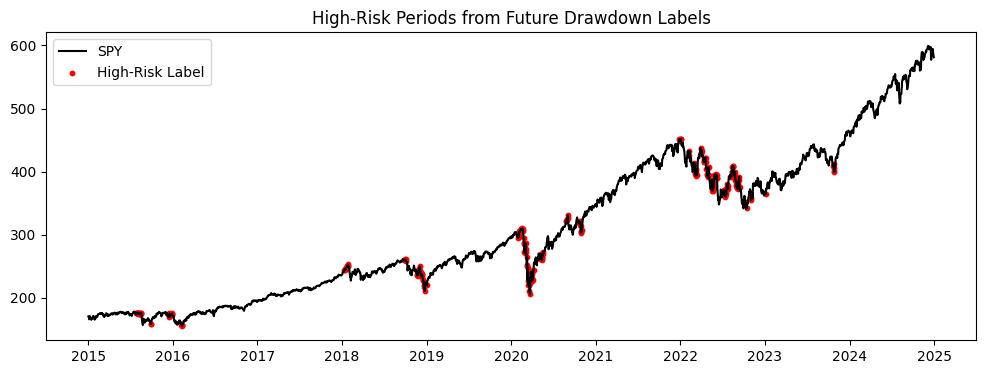

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(spy, label="SPY", color="black")

risk_days = labels[labels == 1].index
plt.scatter(
    risk_days,
    spy.loc[risk_days],
    color="red",
    s=10,
    label="High-Risk Label"
)

plt.title("High-Risk Periods from Future Drawdown Labels")
plt.legend()
plt.show()


In [12]:
X = pd.read_csv(
    "../data/processed/features.csv",
    index_col=0,
    parse_dates=True
)

data = X.copy()
data["risk_label"] = labels
data = data.dropna()

data.head()


,vol_20,vol_60,vol_120,vol_ratio_20_60,vol_ratio_60_120,skew_60,drawdown,risk_label
Date,,,,,,,,
2015-06-25,0.113112,0.167518,0.193649,0.675226,0.865059,0.858472,-0.013939,0
2015-06-26,0.110510,0.167839,0.191536,0.658427,0.876276,0.855908,-0.017401,0
2015-06-29,0.129978,0.174094,0.193719,0.746599,0.898693,0.656272,-0.038343,0
2015-06-30,0.131448,0.171461,0.192855,0.766636,0.889070,0.723492,-0.036280,0
2015-07-01,0.135626,0.171956,0.189520,0.788728,0.907322,0.680808,-0.028605,0


In [13]:
data.to_csv("../data/processed/ml_dataset.csv")
